In [93]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

import pickle

In [94]:
data = pd.read_csv("./diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [96]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
print(data.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [97]:
data['Glucose'].fillna(data['Glucose'].mean(), inplace = True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace = True)
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace = True)
data['Insulin'].fillna(data['Insulin'].median(), inplace = True)
data['BMI'].fillna(data['BMI'].median(), inplace = True)

<Axes: >

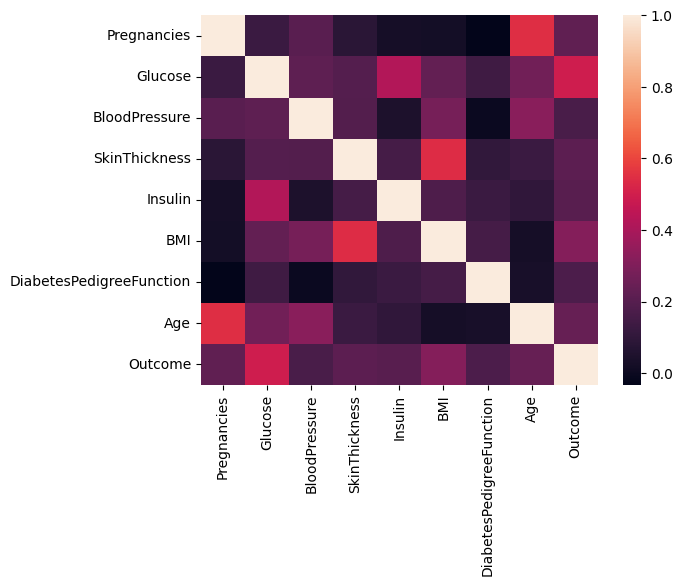

In [98]:
sns.heatmap(data.corr())

In [99]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
y = data["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [100]:
model =  KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(model, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1).fit(X_train, y_train)
print(grid.best_params_)
accuracy = grid.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'n_neighbors': 17}
Accuracy for our training dataset with tuning is : 75.88%


In [101]:
knn = KNeighborsClassifier(n_neighbors=28)

knn.fit(X, y)

y_pred=knn.predict(X_test) 

test_accuracy=accuracy_score(y_test,y_pred)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 85.06%


<Axes: >

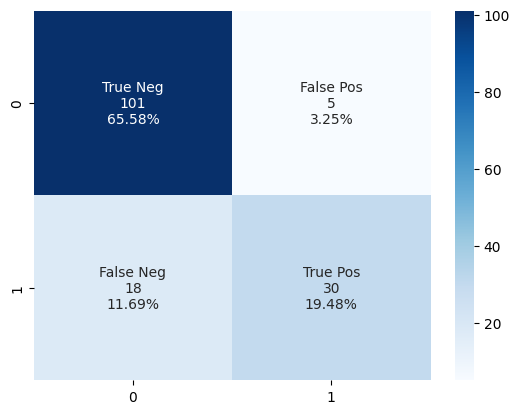

In [102]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix(y_test,y_pred).flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix(y_test,y_pred).flatten()/np.sum(confusion_matrix(y_test,y_pred))]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test,y_pred), annot=labels, fmt='', cmap='Blues')

In [103]:
pickle.dump(knn , open('diabetes-prediction-model.pkl' , 'wb'))
pickle.dump(sc_X , open('scaler.pkl' , 'wb'))

In [104]:
loaded_model = pickle.load(open('diabetes-prediction-model.pkl' , 'rb'))

loaded_model_accuracy = loaded_model.score(X_test, y_test)

print("Loaded Model Accuracy:" , loaded_model_accuracy * 100 , "%")

Loaded Model Accuracy: 85.06493506493507 %


In [106]:
sc = pickle.load(open('scaler.pkl' , 'rb'))